## PulseSimulator readout tutorial

In [36]:
import os

import matplotlib.pyplot as plt
import numpy as np

import qibolab
from qibolab.pulses import PulseSequence


Let's set up the platform.

In [37]:
os.environ["QIBOLAB_PLATFORMS"] = (r"..\..\tests\emulators")

platform = qibolab.create_platform("ibmfakebelem_q01")

pi_pulse = platform.create_RX_pulse(0)
readout_pulse = platform.create_qubit_readout_pulse(qubit=0, start=pi_pulse.finish)
# #for two readout pulses
# pi_pulse2 = platform.create_RX90_pulse(0, start = readout_pulse.finish)
# readout_pulse2 = platform.create_qubit_readout_pulse(qubit=0, start=pi_pulse2.finish)


[Qibo 0.2.11|INFO|2024-10-08 22:15:42]: Loading platform ibmfakebelem_q01
INFO:qibo.config:Loading platform ibmfakebelem_q01


Let's initialize the required parameters for readout setup. 

- Note that the `readout_simulator_config` consisting of the parameters for ReadoutSimulator shall be included/initialized in runcard.

In [38]:
ps = PulseSequence(*[readout_pulse])
opts = qibolab.ExecutionParameters(
    nshots=100,
    relaxation_time=100e3,
    acquisition_type=qibolab.AcquisitionType.INTEGRATION,
    averaging_mode=qibolab.AveragingMode.SINGLESHOT,
)

To obtain the measurement outcome, first let's look at `gnd` object:

In [39]:
gnd = platform.execute_pulse_sequence(ps, opts)
print("This is gnd object:\n", gnd)
print("This is demodulation data from gnd object:\n", gnd[0].voltage)


[Qibo 0.2.11|INFO|2024-10-08 22:15:42]: Minimal execution time (sequence): 0.012240000000000001
INFO:qibo.config:Minimal execution time (sequence): 0.012240000000000001


 Total run time:   0.01s ] Elapsed 0.01s / Remaining 00:00:00:00
This is gnd object:
 {0: <qibolab.result.IntegratedResults object at 0x00000177DB261E40>, 'ReadoutPulse(61.117, 22400, 0.03, 7_301_661_824.000001, 0, Rectangular(), readout-0, 0)': <qibolab.result.IntegratedResults object at 0x00000177DB261E40>, 'simulation': {'sequence_duration': 13.777777777777777, 'simulation_dt': 13.6, 'simulation_time': 0.020655000116676092, 'output_states': [Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm 

Let's continue with introducing an RX pulse to excite the qubit, and plot the combination of results from `gnd` and `excited`:

[Qibo 0.2.11|INFO|2024-10-08 22:15:43]: Minimal execution time (sequence): 0.0122461117
INFO:qibo.config:Minimal execution time (sequence): 0.0122461117


 Total run time:   0.96s*] Elapsed 0.96s / Remaining 00:00:00:00


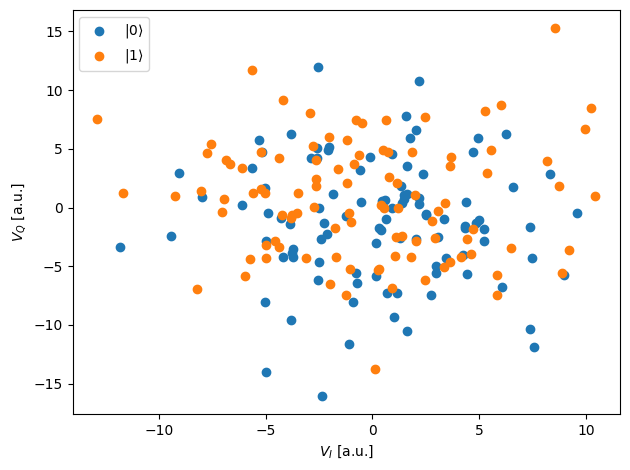

In [40]:
ps.add(pi_pulse)
excited = platform.execute_pulse_sequence(ps, opts)


i_ground = gnd[0].voltage_i
q_ground = gnd[0].voltage_q

i_excited = excited[0].voltage_i    
q_excited = excited[0].voltage_q  

# evenly distributed as measurement of ground state(excited state) results in
# excited state(ground state) due to noise and statistical fluctuations in measurement
plt.scatter(i_ground, q_ground, label=r"$|0\rangle$")
plt.scatter(i_excited, q_excited, label=r"$|1\rangle$")

plt.xlabel(r"$V_I$ [a.u.]")
plt.ylabel(r"$V_Q$ [a.u.]")

# #when scale in noise_model = 0
# plt.xlim([0,0.8])

plt.legend()
plt.tight_layout()
# plt.savefig("IQ_pulse_simulator.png", dpi=300)
plt.show()